In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("House_Prices _Full.csv")
df.shape

(4600, 18)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
df.country.value_counts()

USA    4600
Name: country, dtype: int64

In [6]:
df.waterfront.value_counts()

0    4567
1      33
Name: waterfront, dtype: int64

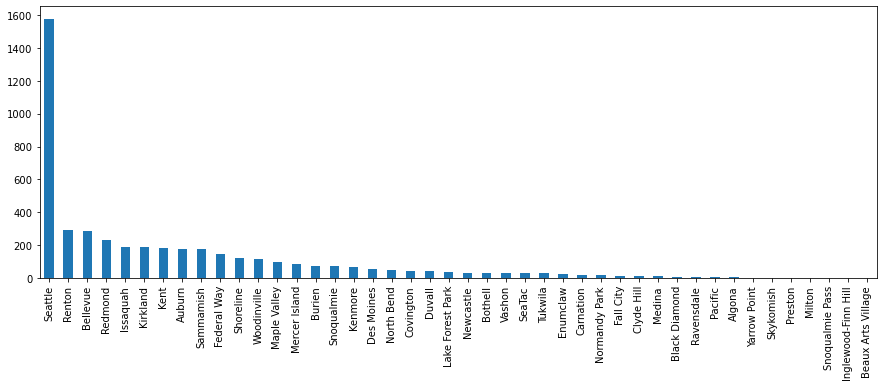

In [7]:
plt.figure(figsize=(15,5))
df.city.value_counts().plot.bar()
plt.show()

In [8]:
df = df[df['city'] == 'Seattle']
df.shape

(1573, 18)

In [9]:
df.drop(['country','city','street','date','waterfront'],axis = 1,inplace=True)

In [10]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
1,2384000.0,5.0,2.5,3650,9050,2.0,4,5,3370,280,1921,0,WA 98119
5,490000.0,2.0,1.0,880,6380,1.0,0,3,880,0,1938,1994,WA 98115
9,640000.0,4.0,2.0,1520,6200,1.5,0,3,1520,0,1945,2010,WA 98115
11,1400000.0,4.0,2.5,2920,4000,1.5,0,5,1910,1010,1909,1988,WA 98105
13,365000.0,3.0,1.0,1090,6435,1.0,0,4,1090,0,1955,2009,WA 98106


In [11]:
df.statezip.value_counts()

WA 98103    148
WA 98117    132
WA 98115    130
WA 98125     89
WA 98144     80
WA 98118     79
WA 98126     78
WA 98112     69
WA 98199     68
WA 98106     66
WA 98122     66
WA 98116     65
WA 98107     58
WA 98136     57
WA 98105     49
WA 98119     49
WA 98133     48
WA 98108     46
WA 98146     45
WA 98178     45
WA 98109     30
WA 98177     27
WA 98168     25
WA 98102     23
WA 98148      1
Name: statezip, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['statezip'] = le.fit_transform(df['statezip'])

In [13]:
df.statezip.value_counts()

1     148
10    132
8     130
14     89
18     80
11     79
15     78
7      69
24     68
3      66
13     66
9      65
4      58
17     57
2      49
12     49
16     48
5      46
23     45
19     45
6      30
22     27
21     25
0      23
20      1
Name: statezip, dtype: int64

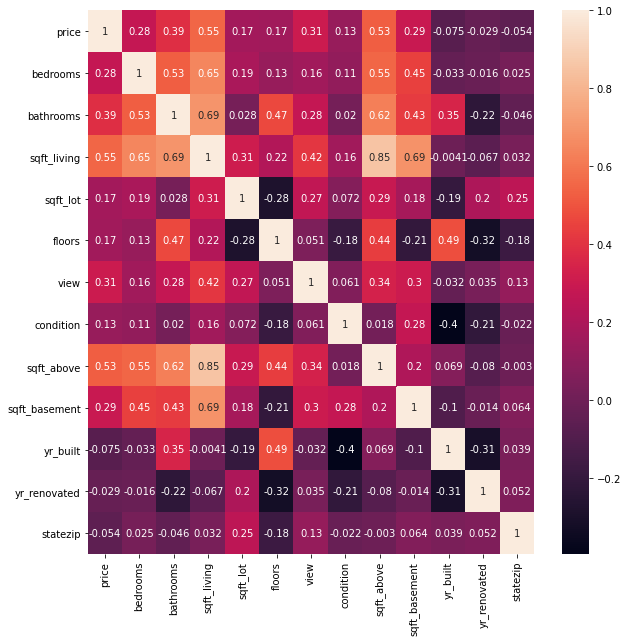

In [14]:
import seaborn as sn
plt.figure(figsize = (10,10))
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

## SIMPLE LINEAR REGRESSION

In [15]:
X = df[['sqft_living']]
y = df[['price']]

In [16]:
model = linear_model.LinearRegression()

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

In [18]:
model.fit(X_train, y_train)

LinearRegression()

In [19]:
model.score(X_test, y_test)

0.654846825261286

In [20]:
test_pred = model.predict(X_test)  
train_pred = model.predict(X_train)  

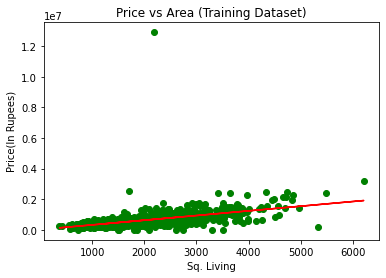

In [21]:
import matplotlib.pyplot as mtp
mtp.scatter(X_train, y_train, color="green")   
mtp.plot(X_train, train_pred, color="red")    
mtp.title("Price vs Area (Training Dataset)")  
mtp.xlabel("Sq. Living")  
mtp.ylabel("Price(In Rupees)")  
mtp.show()   

## MULTIPLE LINEAR REGRESSION 

In [22]:
X = df.drop(['price','sqft_lot','floors','yr_renovated'],axis = 1)
y = df['price']

In [23]:
X

,bedrooms,bathrooms,sqft_living,view,condition,sqft_above,sqft_basement,yr_built,statezip
1,5.0,2.50,3650,4,5,3370,280,1921,12
5,2.0,1.00,880,0,3,880,0,1938,8
9,4.0,2.00,1520,0,3,1520,0,1945,8
11,4.0,2.50,2920,0,5,1910,1010,1909,2
13,3.0,1.00,1090,0,4,1090,0,1955,3
...,...,...,...,...,...,...,...,...,...
4582,2.0,1.00,1290,0,4,1290,0,1906,8
4585,3.0,1.00,1890,0,4,1390,500,1901,1
4591,3.0,1.75,1880,0,4,940,940,1945,15
4595,3.0,1.75,1510,0,4,1510,0,1954,16


In [24]:
model = linear_model.LinearRegression()

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

In [26]:
model.fit(X_train, y_train)

LinearRegression()

In [27]:
model.score(X_test, y_test)

0.7321857882187244